Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<u>**ACTIVITY NO. 7** | **Performing Face Recognition**
**Name** | Cu, Angelo Luis
**Section** | CPE32S3
**Date Performed**: | 2/20/2025
**Date Submitted**: | 2/21/2025
**Instructor**: | Engr. Roman M. Richard


<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

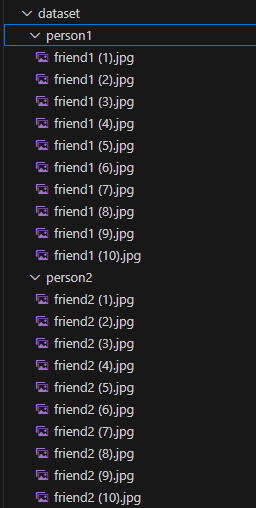

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [2]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [2]:
test_data = read_images("dataset")
print(test_data)

[[array([[199, 200, 200, ..., 174, 175, 173],
       [200, 200, 200, ..., 174, 175, 173],
       [201, 200, 200, ..., 175, 175, 174],
       ...,
       [131, 132, 132, ..., 198, 198, 199],
       [131, 132, 132, ..., 198, 198, 199],
       [131, 133, 132, ..., 199, 199, 200]], dtype=uint8), array([[214, 215, 213, ..., 147, 146, 146],
       [213, 213, 211, ..., 148, 147, 147],
       [213, 212, 211, ..., 150, 150, 151],
       ...,
       [161, 161, 161, ...,  82,  82,  83],
       [161, 162, 162, ...,  82,  84,  84],
       [162, 163, 162, ...,  77,  81,  83]], dtype=uint8), array([[197, 198, 198, ..., 169, 168, 168],
       [198, 198, 198, ..., 170, 171, 171],
       [198, 198, 198, ..., 170, 172, 172],
       ...,
       [139, 139, 139, ..., 200, 199, 200],
       [138, 139, 138, ..., 199, 199, 201],
       [136, 138, 137, ..., 199, 199, 201]], dtype=uint8), array([[224, 226, 228, ..., 179, 178, 176],
       [225, 226, 227, ..., 179, 176, 174],
       [227, 227, 228, ..., 178, 175,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

The function only takes the filepath of the dataset, with the dataset folder containing subfolders of people we want to detect. These subfolders would then contain the images themselves, with the function then converting these images into arrays of numbers with labels which is used by the machine learning model later. The challenge that I encountered in running the code is understanding how the file system should work for the dataset to be converted properly.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [14]:
def face_rec():
  names = ['Sibling', 'Me'] # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images("dataset", (200,200)) # modified sys.argv[1] to dataset path
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


In [11]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

The script is similar to the face detection code provided under Activity 6, with the difference being an addition of the training of a face classifier in the try except portion, with the input being the dataset of images while the output is the classified label of the face with its confidence.

The first error I encountered is the cv2 not having the `face` module, which was resolved by installing the appropriate library `opencv-contrib-python`

The second error I encountered is that the sizes from trained model and the camera for detection is not the same, which is why the faces are not classified. It is solved by changing the `sz` parameter of `read_images` function

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

Modifying the code, we change the line `model = cv2.face.EigenFaceRecognizer_create()`

to either `cv2.face.FisherFaceRecognizer_create()` or `cv2.face.LBPHFaceRecognizer_create()` as their correct syntax

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

The two values returned by the predict() method according to the documentation (https://docs.opencv.org/3.4/dd/d65/classcv_1_1face_1_1FaceRecognizer.html#ab0d593e53ebd9a0f350c989fcac7f251) are the label and the confidence of the model of its label. It is important since the model might misclassify people, and therefore we can set the confidence level before labelling a particular face.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [19]:
def face_rec(filepath, model):
  names = ['Person1', 'Person2'] # Put your names here for faces to recognize

  [X, y] = read_images(filepath, (200,200))
  y = np.asarray(y, dtype=np.int32)

  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]] 
        if label == "Person2":
          cv2.putText(img, "Recognized Person", (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        else:
          cv2.putText(img, "Unknown Person", (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

#if __name__ == "__main__":
#  face_rec()


In [20]:
# Creation of models
model1 = cv2.face.EigenFaceRecognizer_create()
model2 = cv2.face.FisherFaceRecognizer_create()
model3 = cv2.face.LBPHFaceRecognizer_create()

# Performing face recognition using EigenFaces model
face_rec("dataset", model1)

In [22]:
# Performing face recognition using FisherFaces model
face_rec("dataset", model2)

In [24]:
# Performing face recognition using LBPHFaces model
face_rec("dataset", model3)

The answers for questions 2 to 3 are saved in a google docs file with the link: https://docs.google.com/document/d/1-jIIiJnK3Bw6Vt0dNwLw5vOU1_fbQoG9SS6xXxhkG4o/edit?usp=sharing

## 5. Summary, Conclusions and Lessons Learned

In conclusion, I have learned how to perform face recognition by using different models available on OpenCV. I also applied data collection from the first Data Science course to create a dataset for images, which is then converted to an array of numbers with labels. Finally, after testing the three models with my custom dataset, the best for classification is the FisherFaces model.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*